# BACH mars3D: overview

In [26]:
import os
from glob import glob

import numpy as np
import xarray as xr
import pandas as pd

from tqdm import tqdm

import dask
from dask import delayed

from matplotlib import pyplot as plt
%matplotlib inline

import cartopy.crs as ccrs
import cartopy.feature as cfeature
import cartopy.geodesic as cgeo

#from taos import mars as ms

In [2]:
if False:
    
    from dask.distributed import Client
    from dask_jobqueue import PBSCluster

    cluster = PBSCluster()
    #cluster = PBSCluster(processes=4, cores=4) # std
    
    w = cluster.scale(jobs=2)
    
    client = Client(cluster)
    client
else:
    from dask.distributed import Client, LocalCluster
    #
    cluster = LocalCluster()
    client = Client(cluster)
    client

---

## load data subset

In [17]:
def browse_files():
    """ Browse simulation directory and figure out output files
    """
    root_dir = "/home/datawork-lops-oc/GDG/BACH1000_100lev-REF1.9_ST_exp04-S/DAILY_MEAN/"
    suff = "BACH1000_"
    dpath = os.path.join(root_dir, "*/"+suff+"*.nc")
    files = sorted(glob(dpath))
    dates = [extract_date(f) for f in files]
    df = pd.DataFrame({"files": files}, index=dates)
    return df

def extract_date(f):
    """ extract date from file name
    """
    # BACH1000_100lev-REF1.9_ST_exp04_2006-12-01-2006-12-31.nc
    _date = (f.split("/")[-1]
             .split("_")[-1]
             .split("-")
            )
    _date = "-".join(_date[:3])
    return pd.Timestamp(_date)

In [21]:
files = browse_files()
print("Number of data files = {} ".format(len(files)))
files.head()

Number of data files = 21 


,files
2011-03-01,/home/datawork-lops-oc/GDG/BACH1000_100lev-REF...
2011-04-01,/home/datawork-lops-oc/GDG/BACH1000_100lev-REF...
2011-05-01,/home/datawork-lops-oc/GDG/BACH1000_100lev-REF...
2011-06-01,/home/datawork-lops-oc/GDG/BACH1000_100lev-REF...
2011-07-01,/home/datawork-lops-oc/GDG/BACH1000_100lev-REF...


In [23]:
files.iloc[0]

files    /home/datawork-lops-oc/GDG/BACH1000_100lev-REF...
Name: 2011-03-01 00:00:00, dtype: object

In [31]:
ds = xr.open_dataset(files.iloc[0]["files"]).isel(time_counter=0)
ds

<xarray.Dataset>
Dimensions:               (y_dom_T: 1282, x_dom_T: 1449, sigma_T: 100, y_dom_U: 1282, x_dom_U: 1449, y_dom_V: 1282, x_dom_V: 1449, axis_nbounds: 2)
Coordinates:
    nav_lat_dom_T         (y_dom_T, x_dom_T) float32 ...
    nav_lon_dom_T         (y_dom_T, x_dom_T) float32 ...
  * sigma_T               (sigma_T) float32 -0.995 -0.985 ... -0.015 -0.005
    nav_lat_dom_U         (y_dom_U, x_dom_U) float32 ...
    nav_lon_dom_U         (y_dom_U, x_dom_U) float32 ...
    nav_lat_dom_V         (y_dom_V, x_dom_V) float32 ...
    nav_lon_dom_V         (y_dom_V, x_dom_V) float32 ...
    time_centered         datetime64[ns] ...
    time_counter          datetime64[ns] 2011-03-01T12:00:00
Dimensions without coordinates: y_dom_T, x_dom_T, y_dom_U, x_dom_U, y_dom_V, x_dom_V, axis_nbounds
Data variables:
    xe                    (y_dom_T, x_dom_T) float32 ...
    time_centered_bounds  (axis_nbounds) datetime64[ns] ...
    time_counter_bounds   (axis_nbounds) datetime64[ns] ...
    sal                   (sigma_T, y_dom_T, x_dom_T) float32 ...
    temp                  (sigma_T, y_dom_T, x_dom_T) float32 ...
    wz_phys               (sigma_T, y_dom_T, x_dom_T) float32 ...
    uz                    (sigma_T, y_dom_U, x_dom_U) float32 ...
    u                     (y_dom_U, x_dom_U) float32 ...
    vz                    (sigma_T, y_dom_V, x_dom_V) float32 ...
    v                     (y_dom_V, x_dom_V) float32 ...
Attributes:
    name:         BACH1000_100lev-REF1.9_ST_exp04
    description:  Created by xios
    title:        Created by xios
    Conventions:  CF-1.5
    production:   An IPSL model
    timeStamp:    2017-Dec-22 10:16:07 CET

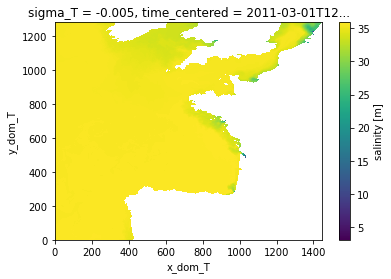

In [30]:
ds["sal"].isel(sigma_T=-1).plot()